# GLayout Simple Via Creation Tutorial

```
OpenFASOC Team, June 2025
SPDX-License-Identifier: Apache-2.0
```


## Introduction
Welcome!
This notebook serves as an introduction to the GDSFactory-based layout automation tool **GLayout** and an example producing a VIA to explain grules and glayers, as a part of [OpenFASoC](https://github.com/idea-fasoc/OpenFASOC).  

## Tool requirements
### All the requirements are contained in OSIC-IIC-TOOLS
**Python Dependencies**
* [`gdsfactory`](https://github.com/gdsfactory/gdsfactory): Provides the backend for GDS manipulation.
* [`sky130`](https://github.com/gdsfactory/skywater130): The Skywater 130nm PDK Python package for GDSFactory to use in this demo.
* [`gf180`](https://github.com/gdsfactory/gf180): The GF 180nm PDK Python package for GDSFactory to use in this demo.
* [`gdstk`](https://heitzmann.github.io/gdstk/): (installed as a part of gdsfactory) Used for converting GDS files into SVG images for viewing.
* [`svgutils`](https://svgutils.readthedocs.io/en/latest/): To scale the SVG image.

**System Dependencies**
* [`klayout`](https://klayout.de/): For DRC (Design Rule Checking).



#### 1.1. Importing Libraries and Utility Functions

In [1]:
import gdstk
import svgutils.transform as sg
import IPython.display
from IPython.display import clear_output
import ipywidgets as widgets

# Redirect all outputs here
hide = widgets.Output()

def display_gds(gds_file, scale = 3):
  # Generate an SVG image
  top_level_cell = gdstk.read_gds(gds_file).top_level()[0]
  top_level_cell.write_svg('out.svg')
  # Scale the image for displaying
  fig = sg.fromfile('out.svg')
  fig.set_size((str(float(fig.width) * scale), str(float(fig.height) * scale)))
  fig.save('out.svg')

  # Display the image
  IPython.display.display(IPython.display.SVG('out.svg'))

def display_component(component, scale = 3):
  # Save to a GDS file
  with hide:
    component.write_gds("out.gds")
  display_gds('out.gds', scale)

**1. Import Required Modules**

The via function will use several imports:

* a pdk from glayout: PDK for GF180/SKY130 (180-nanometer technology node) provided by the glayout package. The PDK contains technology-specific information including rules and layers.

* Component from gdsfactory: This is a class representing a layout component, which includes polygons, paths, etc.

* rectangle from gdsfactory.components: This function creates a rectangle polygon.

In [2]:
from glayout import sky130, gf180
from gdsfactory import Component
from gdsfactory.components import rectangle

**2. Define the Via Function**

The function create_via which takes a single argument which is the PDK. Inside the function, the following steps are executed:

* Via Dimensions: Using the get_grule method of the PDK object, the width of the via is retrieved from the technology's design rules. This rule specifies the minimum size that the via can be. This dimension is set as both the length and width for a via.

* Metal Dimensions: The dimensions of the metal layers above and below the via are determined. These dimensions must accommodate the via and any required enclosure space as mandated by the PDK. Enclosure space refers to the required minimum spacing between the edge of the via and the edge of the surrounding metal layer.

* Layer Retrieval: The get_glayer method retrieves the specific layer numbers or names from the PDK. These are then used to assign the correct graphical layers to the shapes that will be generated.

* Shape Creation and Placement: An empty Component instance named top_level is created, representing the top component in which all shapes will be placed. Using the insertion operator (<<), rectangles representing the metal layers and via are added to the top_level component with their specified sizes and layers.

* Return Value: The top_level component, now containing the layout shapes for the metals and via, is the return value of the function. This component can be written out as a GDSII file.

In [3]:
def create_via(pdk):
  # Define the via dimensions and rules
  via_dimension = pdk.get_grule('via1')['width']
  metal1_dimension = via_dimension + 2 * pdk.get_grule('via1','met1')['min_enclosure']
  metal2_dimension = via_dimension + 2 * pdk.get_grule('via1','met2')['min_enclosure']

  # Get the layers for via and metals
  via_layer = pdk.get_glayer('via1')
  metal1_layer = pdk.get_glayer('met1')
  metal2_layer = pdk.get_glayer('met2')

  # Create the component and add the layers
  top_level = Component(name='via_example')
  top_level << rectangle(size=(via_dimension, via_dimension), layer=via_layer)
  top_level << rectangle(size=(metal1_dimension, metal1_dimension), layer=metal1_layer)
  top_level << rectangle(size=(metal2_dimension, metal2_dimension), layer=metal2_layer)

  return top_level

**4. Run the Via Function and Generate Layout**

In [4]:
create_via(pdk=gf180).write_gds("via_example_gf180.gds")

2025-06-26 18:24:59.225 | WARNING  | gdsfactory.pdk:get_active_pdk:733 - No active PDK. Activating generic PDK.

2025-06-26 18:24:59.443 | INFO     | gdsfactory.technology.layer_views:__init__:790 - Importing LayerViews from YAML file: '/headless/conda-env/miniconda3/envs/GLdev/lib/python3.10/site-packages/gdsfactory/generic_tech/layer_views.yaml'.
2025-06-26 18:24:59.444 | INFO     | gdsfactory.pdk:activate:337 - 'generic' PDK is now active
2025-06-26 18:24:59.456 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'via_example_gf180.gds'


PosixPath('via_example_gf180.gds')

**5. View the Generated Layout**
- Open KLayout and load the generated GDS file to view your layout.
- Or view in notebook with the following code block.

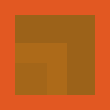

In [5]:
display_gds('via_example_gf180.gds',scale=20)

By concluding these steps, you will have downloaded Glayout, installed the necessary dependencies, and completed the construction of a simple via using Glayout.